In [1]:
import pandas as pd

# Load the dataset
file_path = "D:\\Data Science\\assignments\\EastWestAirlines.xlsx"
xls = pd.ExcelFile(file_path)

# Check available sheet names
xls.sheet_names

['Description', 'data']

In [2]:
# Load the main data sheet
df = pd.read_excel(file_path, sheet_name='data')

# Display dataset info
df.info()

# Preview first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
# Check for missing values in the dataset
df.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

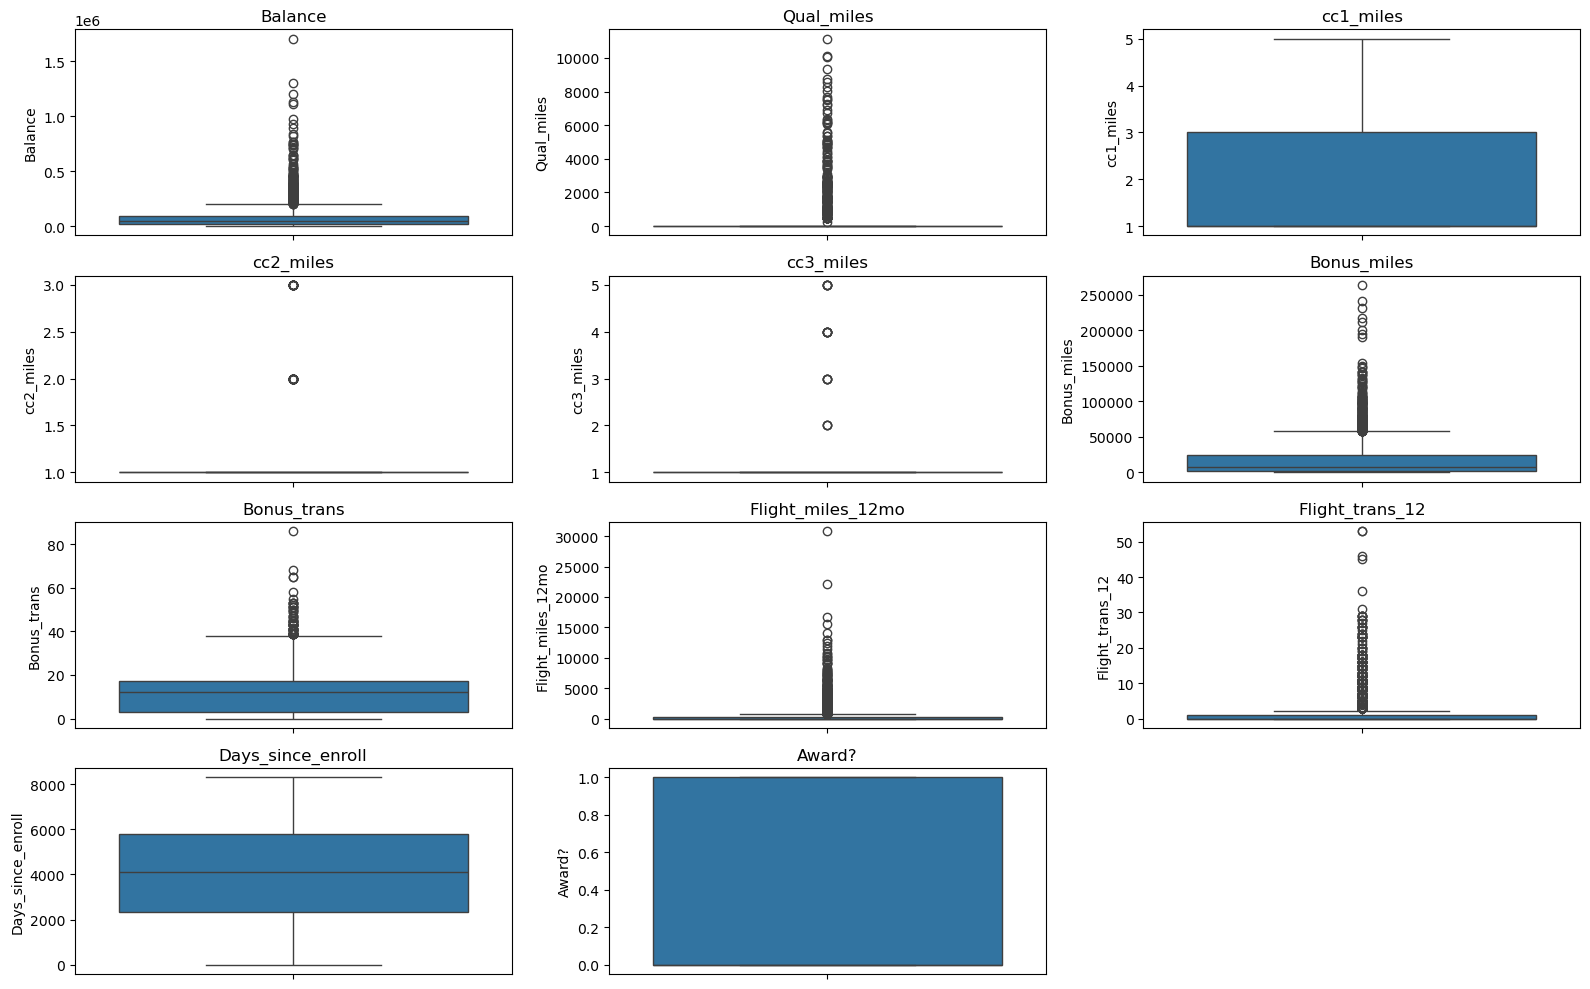

In [4]:
# Outlier Detection

import matplotlib.pyplot as plt
import seaborn as sns

# Copy of the data without ID#
df_no_id = df.drop('ID#', axis=1)

plt.figure(figsize=(16, 10))

for i, column in enumerate(df_no_id.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df_no_id[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [5]:
# Outlier Removal (IQR Method)

df_clean = df_no_id.copy()

for column in df_clean.columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only rows within bounds
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

df_clean.shape


(1785, 11)

In [6]:
df_clean

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0
3991,39142,0,3,1,1,14981,28,0,0,1408,0
3992,11181,0,1,1,1,929,12,0,0,1407,0
3993,3974,0,1,1,1,365,3,0,0,1397,0


In [7]:
# Scaling

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform cleaned data
scaled_data = scaler.fit_transform(df_clean)

# Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_data, columns=df_clean.columns)

# Preview the first 5 rows
scaled_df.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.351730,0.0,-0.571271,0.0,0.0,-0.663819,-0.922006,0.0,0.0,1.566499,0.0
1,-0.573510,0.0,-0.571271,0.0,0.0,-0.659907,-0.784064,0.0,0.0,1.551190,0.0
2,-0.022485,0.0,-0.571271,0.0,0.0,-0.287037,-0.508181,0.0,0.0,1.582766,0.0
3,-0.684862,0.0,-0.571271,0.0,0.0,-0.632715,-0.922006,0.0,0.0,1.543535,0.0
4,-0.643890,0.0,-0.571271,0.0,0.0,-0.680421,-1.059947,0.0,0.0,1.538751,0.0


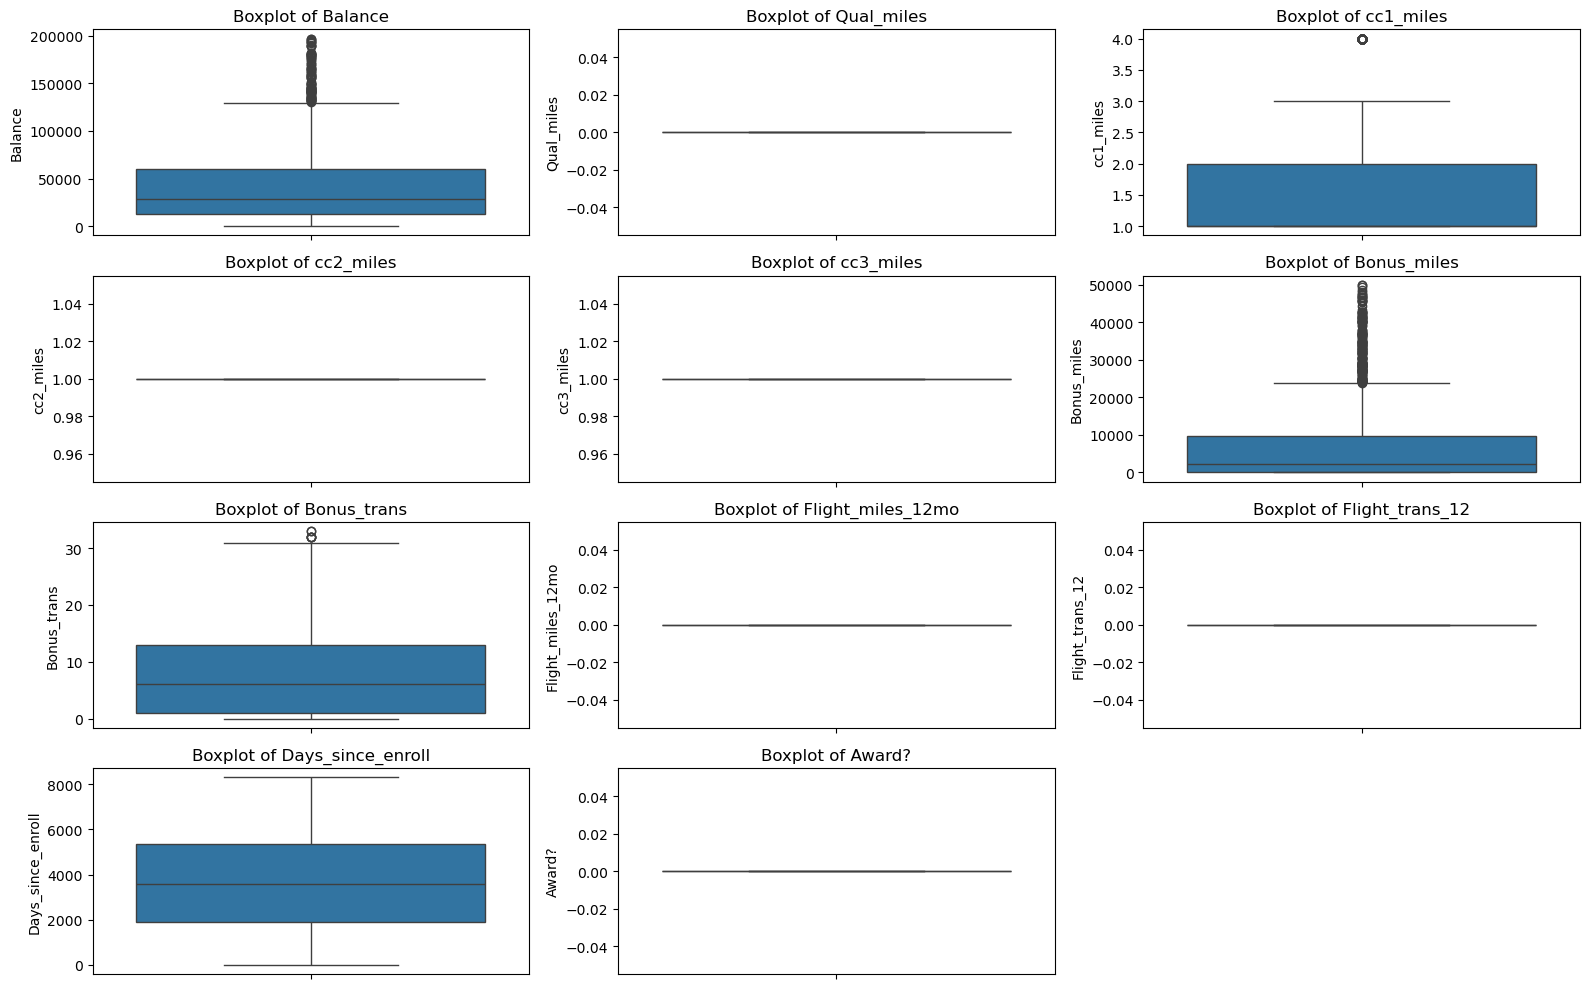

In [8]:
# Check for outliers after removal

plt.figure(figsize=(16, 10))

for i, column in enumerate(df_clean.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df_clean[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [9]:
# Summary statistics of cleaned data
df_clean.describe()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,1785.000000,1785.0,1785.000000,1785.0,1785.0,1785.000000,1785.000000,1785.0,1785.0,1785.000000,1785.0
mean,42256.208964,0.0,1.545658,1.0,1.0,7131.399440,7.684034,0.0,0.0,3725.681232,0.0
std,40136.422130,0.0,0.955433,0.0,0.0,10483.803374,7.251480,0.0,0.0,2090.799689,0.0
min,68.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,8.000000,0.0
25%,12895.000000,0.0,1.000000,1.0,1.0,100.000000,1.000000,0.0,0.0,1879.000000,0.0
50%,28464.000000,0.0,1.000000,1.0,1.0,2155.000000,6.000000,0.0,0.0,3599.000000,0.0
75%,59797.000000,0.0,2.000000,1.0,1.0,9574.000000,13.000000,0.0,0.0,5352.000000,0.0
max,196922.000000,0.0,4.000000,1.0,1.0,49893.000000,33.000000,0.0,0.0,8296.000000,0.0


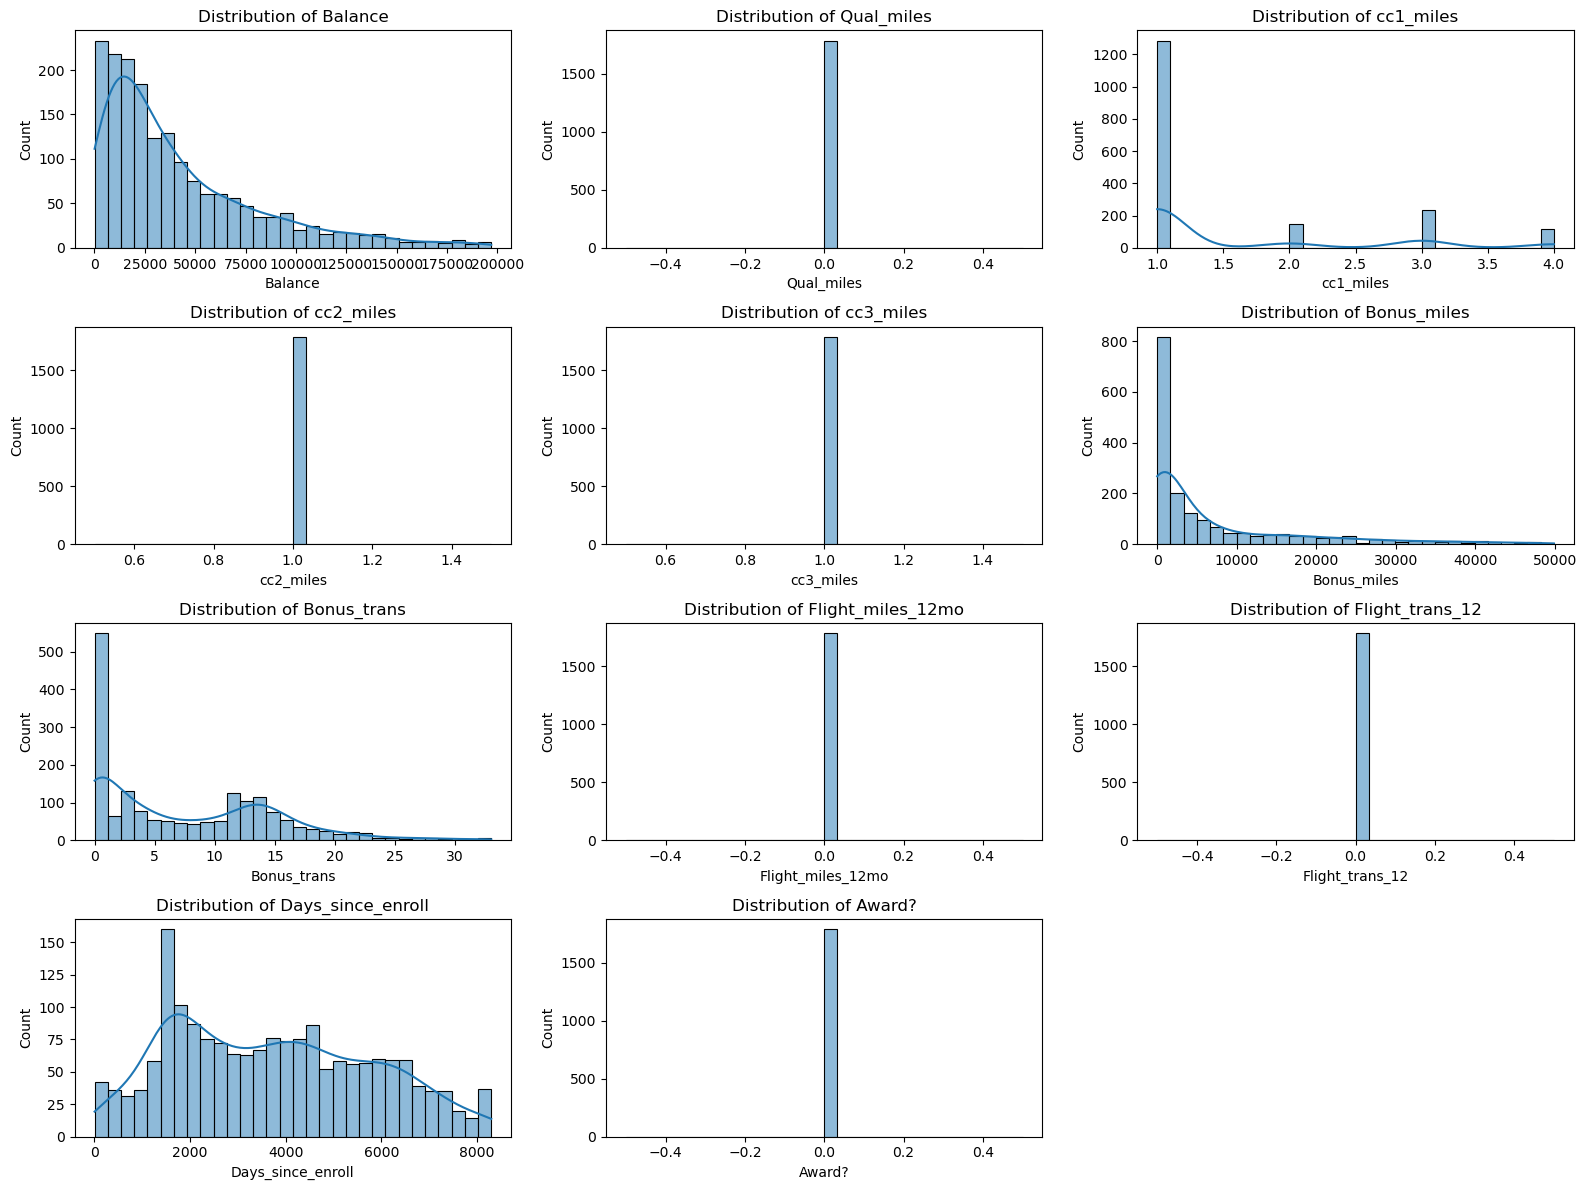

In [10]:
# Distribution of Features

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

for i, column in enumerate(df_clean.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_clean[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


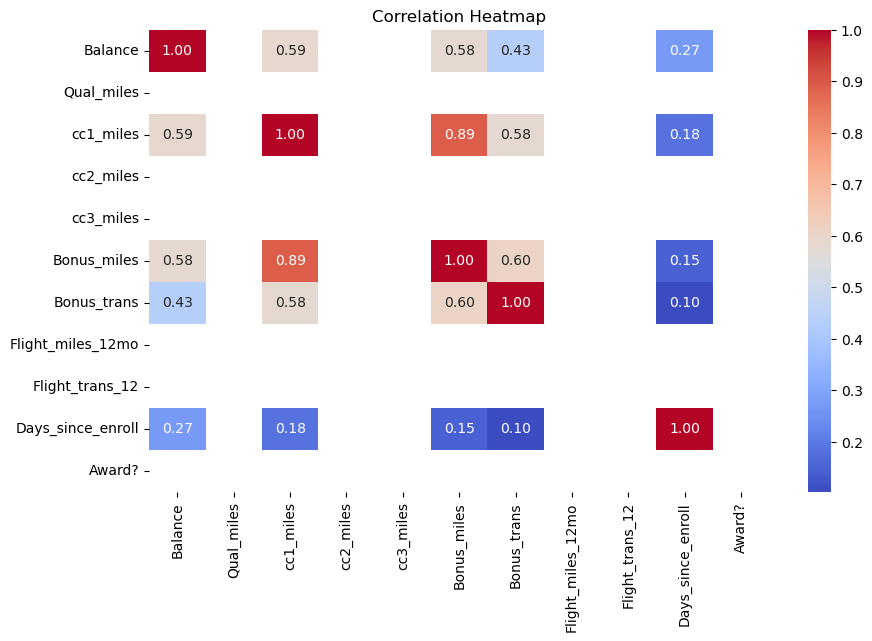

In [11]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


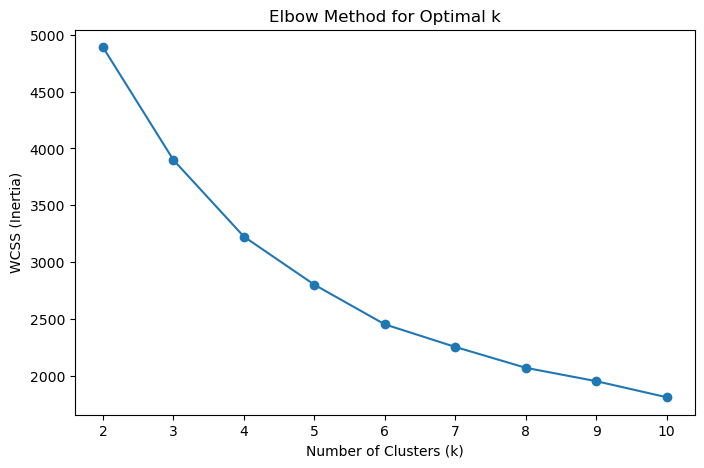

In [12]:
# K-Means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares

# Try k values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()


In [ ]:
"""
  From Elbow Method plot, we can see that:
  The curve bends sharply around k = 4 and starts to flatten afterward.
  This suggests 4 clusters is likely the optimal number.
  
"""

In [13]:
# Silhouette Scores for k = 2 to 10

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"For k={k}, Silhouette Score = {score:.3f}")


For k=2, Silhouette Score = 0.472
For k=3, Silhouette Score = 0.313
For k=4, Silhouette Score = 0.315
For k=5, Silhouette Score = 0.328
For k=6, Silhouette Score = 0.326
For k=7, Silhouette Score = 0.316
For k=8, Silhouette Score = 0.323
For k=9, Silhouette Score = 0.319
For k=10, Silhouette Score = 0.273


In [15]:
# Fit K-Means for k=2 and k=4

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# For K=2
kmeans2 = KMeans(n_clusters=2, random_state=42)
df_clean['Cluster_2'] = kmeans2.fit_predict(scaled_df)

# For K=4
kmeans4 = KMeans(n_clusters=4, random_state=42)
df_clean['Cluster_4'] = kmeans4.fit_predict(scaled_df)


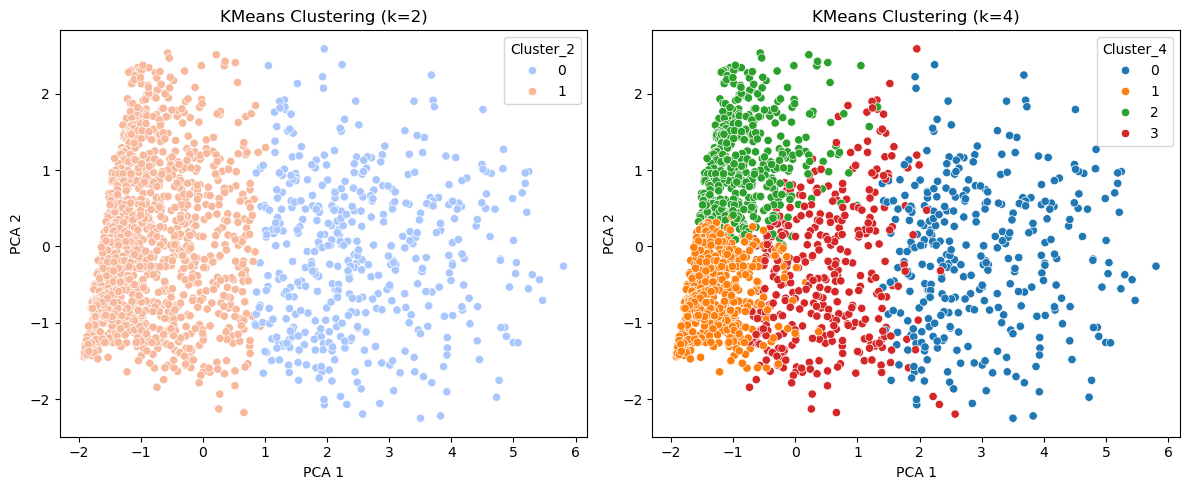

In [16]:
# Visualization
# Visualize Cluster Separation (using PCA for 2D projection)

from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(12,5))

# --- Plot for k=2 ---
plt.subplot(1,2,1)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df_clean['Cluster_2'], palette='coolwarm')
plt.title("KMeans Clustering (k=2)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# --- Plot for k=4 ---
plt.subplot(1,2,2)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df_clean['Cluster_4'], palette='tab10')
plt.title("KMeans Clustering (k=4)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()


In [17]:
# Cluster Characteristics (mean feature values per cluster)

# Mean of each feature per cluster (for k=2)
cluster2_summary = df_clean.groupby('Cluster_2').mean().round(2)

# Mean of each feature per cluster (for k=4)
cluster4_summary = df_clean.groupby('Cluster_4').mean().round(2)

print("Cluster 2 Summary:")
display(cluster2_summary)

print("\nCluster 4 Summary:")
display(cluster4_summary)


Cluster 2 Summary:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_4
Cluster_2,,,,,,,,,,,,
0,87890.50,0.0,2.98,1.0,1.0,21444.45,15.23,0.0,0.0,4474.69,0.0,0.76
1,26690.49,0.0,1.06,1.0,1.0,2249.26,5.11,0.0,0.0,3470.20,0.0,1.75



Cluster 4 Summary:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_2
Cluster_4,,,,,,,,,,,,
0,91901.27,0.0,3.30,1.0,1.0,25096.51,15.23,0.0,0.0,4606.20,0.0,0.00
1,20066.24,0.0,1.01,1.0,1.0,1462.29,2.51,0.0,0.0,1858.03,0.0,1.00
2,28756.27,0.0,1.03,1.0,1.0,1631.04,3.16,0.0,0.0,5614.26,0.0,0.99
3,50134.34,0.0,1.48,1.0,1.0,7061.21,15.01,0.0,0.0,3370.36,0.0,0.70


In [ ]:
"""
Cluster Analysis and Interpretation:

-> The highest Silhouette Score (0.472) occurs at k = 2, which suggests 2 clusters are most distinct and well-separated.

-> However, Elbow Method suggested k = 4 as a reasonable balance point, meaning there’s possibly more substructure 
   within the data (finer segmentation, though less clearly separated).

As per the visualizations and summaries:

-> When k=2, the model clearly separates customers into high-value frequent flyers vs low-value casual users.
-> When k=4, we get finer segmentation — separating customers into four loyalty/engagement levels:
   Elite, Regular, Occasional, and Inactive.

Summary:

-> k=2 is better for high-level segmentation (simple business insight).

-> k=4 provides granular segmentation, useful for targeted marketing and loyalty program design.

"""

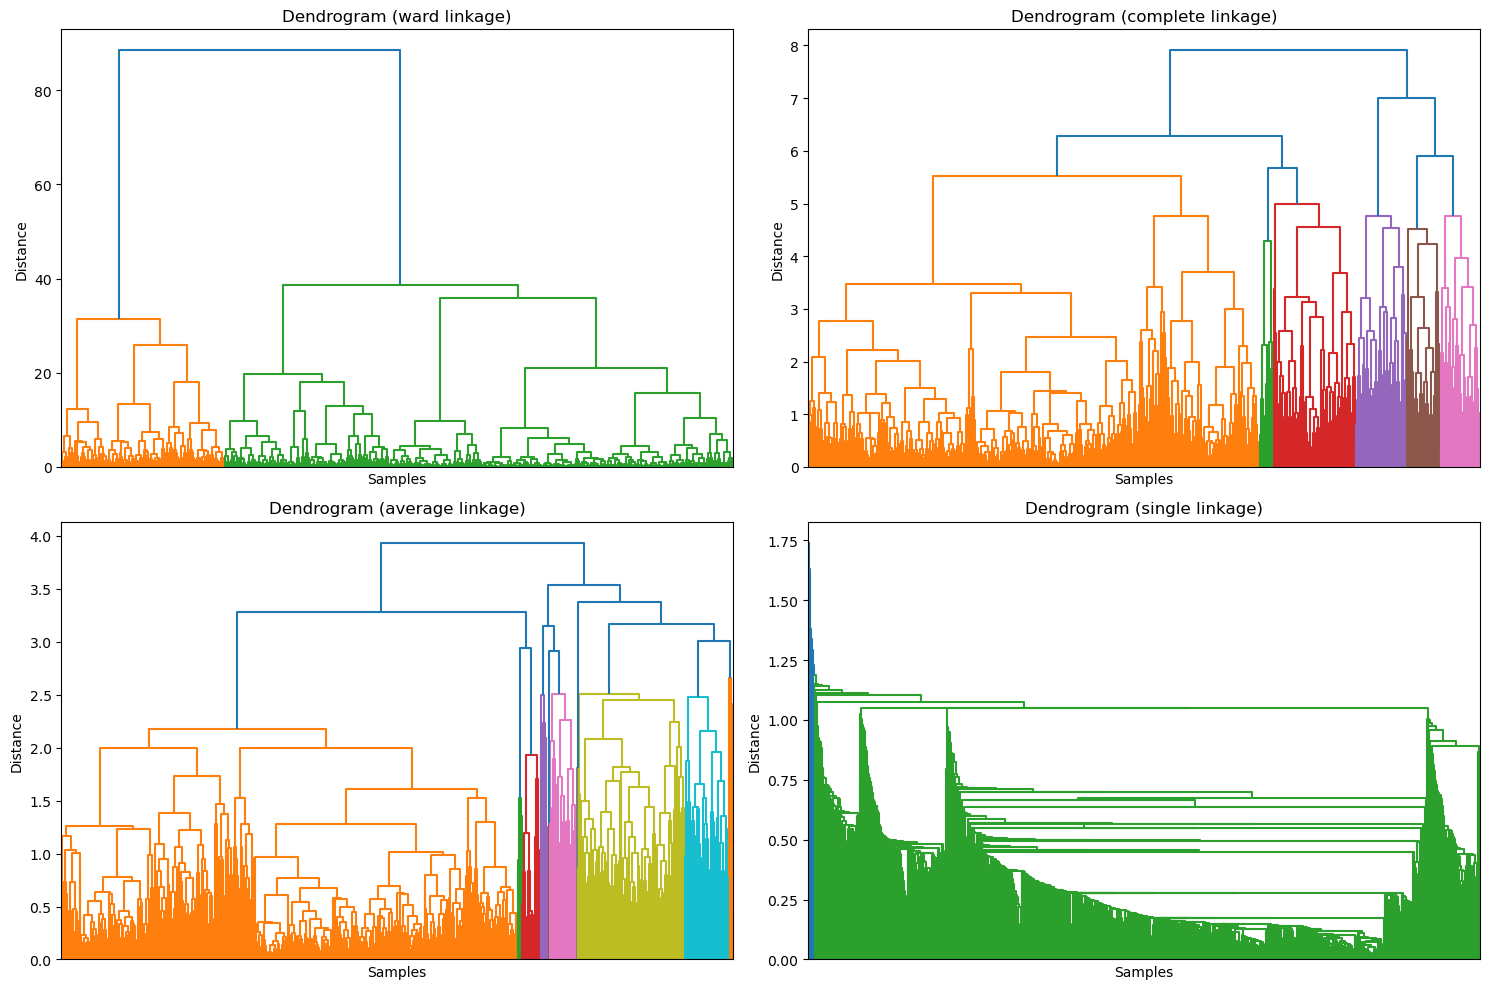

In [18]:
# Hierarchical Clustering (Agglomerative)

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Compare Dendrograms for Different Linkage Criteria 
linkages = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(15, 10))
for i, method in enumerate(linkages, 1):
    plt.subplot(2, 2, i)
    plt.title(f"Dendrogram ({method} linkage)")
    dendrogram = sch.dendrogram(sch.linkage(scaled_df, method=method), no_labels=True)
    plt.xlabel("Samples")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()


In [19]:
for method in ['ward', 'complete', 'average']:
    hc = AgglomerativeClustering(n_clusters=4, linkage=method, metric='euclidean')
    labels = hc.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"Linkage = {method:9s} → Silhouette Score = {score:.3f}")


Linkage = ward      → Silhouette Score = 0.269
Linkage = complete  → Silhouette Score = 0.310
Linkage = average   → Silhouette Score = 0.383


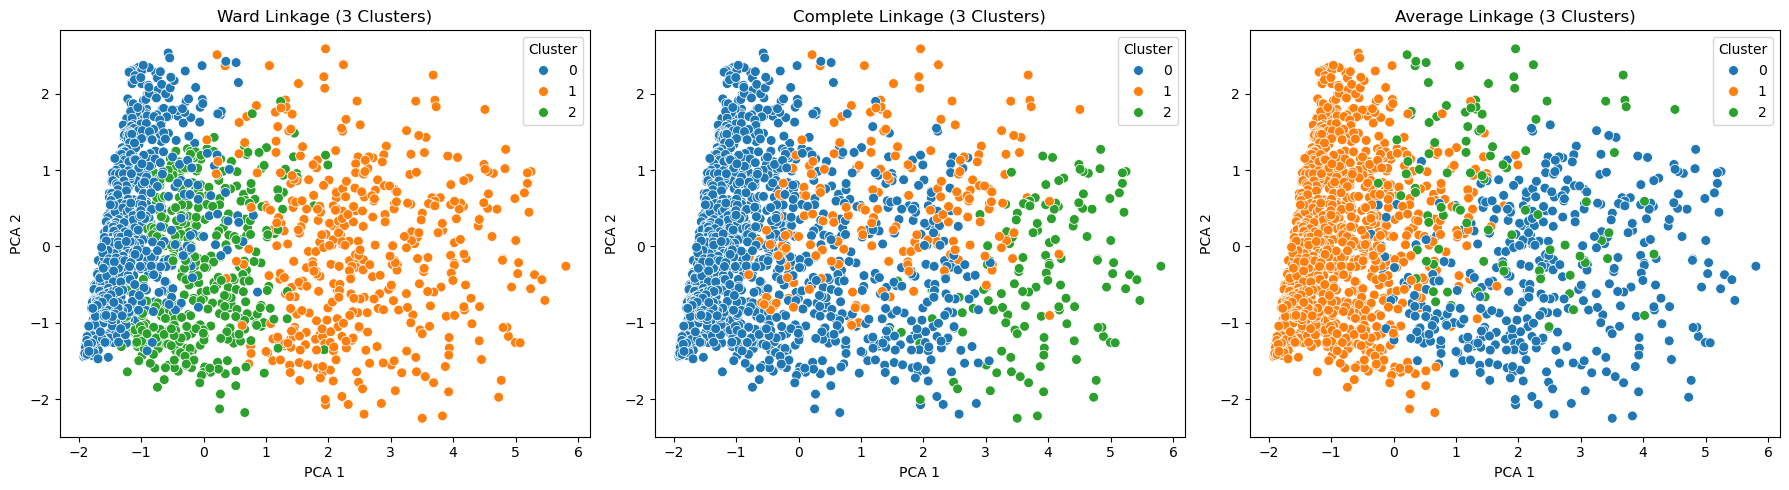

In [22]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Linkage methods to compare
linkage_methods = ['ward', 'complete', 'average']

plt.figure(figsize=(18, 5))

for i, method in enumerate(linkage_methods, 1):
    # Fit Hierarchical Clustering
    hc = AgglomerativeClustering(n_clusters=3, linkage=method, metric='euclidean')
    df_clean[f'Cluster_{method}'] = hc.fit_predict(scaled_df)

    # PCA for visualization
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_df)

    # Plot the PCA scatterplot
    plt.subplot(1, 3, i)
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1],
                    hue=df_clean[f'Cluster_{method}'], palette='tab10', s=50)
    plt.title(f"{method.capitalize()} Linkage (3 Clusters)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Cluster", loc='best')

plt.tight_layout()
plt.show()


In [24]:
# Calculate silhouette scores for a range of cluster numbers
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for a range of cluster numbers
k_range = range(2, 8)  # Test from 2 clusters up to 7
silhouette_scores = []

for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k, linkage='average', metric='euclidean')
    labels = hc.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)
    print(f"Clusters = {k} → Silhouette Score = {score:.3f}")


Clusters = 2 → Silhouette Score = 0.431
Clusters = 3 → Silhouette Score = 0.402
Clusters = 4 → Silhouette Score = 0.383
Clusters = 5 → Silhouette Score = 0.340
Clusters = 6 → Silhouette Score = 0.353
Clusters = 7 → Silhouette Score = 0.338


In [ ]:
"""
Cluster Analysis and Interpretation:

-> Among the three linkage methods, the average linkage produced the highest Silhouette Score (0.383), indicating 
   better-defined clusters compared to ward and complete linkages. This suggests that the average linkage method is 
   more suitable for this dataset.
-> While the PCA visualization for the average linkage method appears less distinct compared to Ward and Complete linkage, 
   the higher Silhouette Score (0.383) indicates that it achieves better separation between clusters in the original 
   feature space. The apparent messiness in 2D is due to dimensionality reduction, not poor clustering performance.
-> Although the highest Silhouette Score (0.431) was obtained for 2 clusters for average linkage, I selected 3 clusters 
   for further analysis.
   The 3-cluster solution (Silhouette = 0.402) provides a more interpretable segmentation of the data while still 
   maintaining good cluster separation.
   Increasing the number of clusters beyond 3 led to smaller, less meaningful groups, indicating over-segmentation.
"""

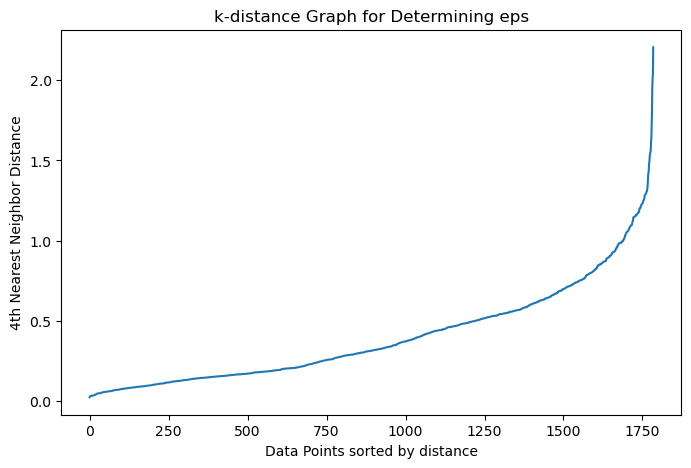

In [25]:
# DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Find suitable eps using k-distance plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

# Sort distances for visualization
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("k-distance Graph for Determining eps")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

In [26]:
# Try different eps and min_samples values 

params = [(0.5, 5), (0.8, 5), (1.0, 5), (1.2, 5), (1.0, 10)]
for eps, min_samp in params:
    db = DBSCAN(eps=eps, min_samples=min_samp)
    labels = db.fit_predict(scaled_df)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    if n_clusters > 1:
        score = silhouette_score(scaled_df, labels)
        print(f"eps={eps}, min_samples={min_samp} → Clusters={n_clusters}, Silhouette={score:.3f}")
    else:
        print(f"eps={eps}, min_samples={min_samp} → Clusters={n_clusters} (too few for Silhouette Score)")


eps=0.5, min_samples=5 → Clusters=11, Silhouette=-0.050
eps=0.8, min_samples=5 → Clusters=5, Silhouette=0.208
eps=1.0, min_samples=5 → Clusters=5, Silhouette=0.244
eps=1.2, min_samples=5 → Clusters=1 (too few for Silhouette Score)
eps=1.0, min_samples=10 → Clusters=4, Silhouette=0.231


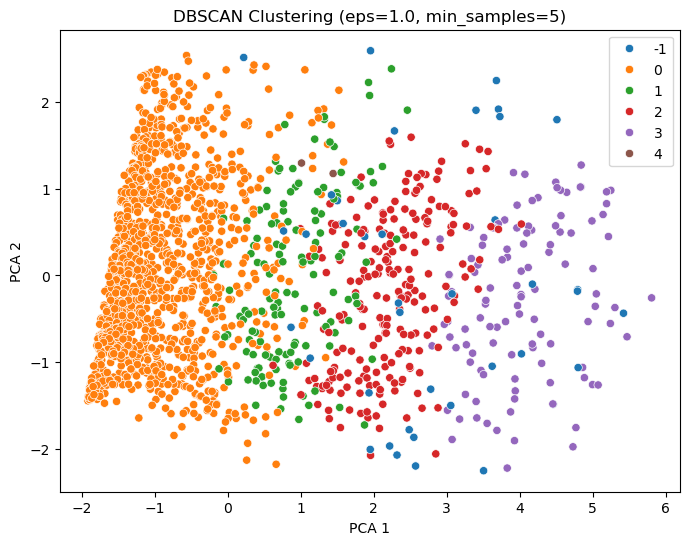

In [27]:
# Visualization
best_eps = 1.0
best_min_samples = 5

db_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
db_labels = db_best.fit_predict(scaled_df)

# Add to dataframe
df_clean['DBSCAN_Cluster'] = db_labels

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=db_labels, palette='tab10', legend='full')
plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [28]:
# Check number of noise points 

noise_points = list(db_labels).count(-1)
print(f"Number of noise points: {noise_points}")

Number of noise points: 39


In [ ]:
"""
Cluster Analysis and Interpretation:

-> The k-distance graph showed a clear elbow around 1.0, confirming it as a good choice for eps.

-> DBSCAN successfully identified five clusters and a few outliers/noise points (39 samples) that didn’t belong to any 
   cluster.

-> The Silhouette Score (0.244) is moderate — lower than K-Means and Hierarchical — which is typical because DBSCAN forms 
   irregularly shaped clusters based on data density rather than distance alone.

-> Unlike K-Means or Hierarchical, DBSCAN does not require pre-specifying the number of clusters, making it more flexible 
   for complex data.

"""

In [ ]:
"""
Evaluation and Performance Metrics:

K-MEANS:

For k=2, Silhouette Score = 0.472
For k=3, Silhouette Score = 0.313
For k=4, Silhouette Score = 0.315
For k=5, Silhouette Score = 0.328
For k=6, Silhouette Score = 0.326
For k=7, Silhouette Score = 0.316
For k=8, Silhouette Score = 0.323
For k=9, Silhouette Score = 0.319
For k=10, Silhouette Score = 0.273

DBSCAN:

eps=0.5, min_samples=5 → Clusters=11, Silhouette=-0.050
eps=0.8, min_samples=5 → Clusters=5, Silhouette=0.208
eps=1.0, min_samples=5 → Clusters=5, Silhouette=0.244
eps=1.2, min_samples=5 → Clusters=1 (too few for Silhouette Score)
eps=1.0, min_samples=10 → Clusters=4, Silhouette=0.231

"""